In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline    
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [12]:
CSV_FILE = "D:\\hyddataset.csv"        
df = pd.read_csv(CSV_FILE)

# date + time → datetime index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'],format='%m/%d/%Y %H:%M:%S')
df = df.set_index('datetime').drop(['name','date','time'], axis=1)

#4 columns we need
cols = ['temp','humidity','windspeed','sealevelpressure']
df = df[cols].dropna()

print(f"Loaded {len(df)} rows")
print(df)

Loaded 202 rows
                     temp  humidity  windspeed  sealevelpressure
datetime                                                        
2025-11-12 00:00:00  72.8     55.00        9.2            1015.0
2025-11-12 01:00:00  72.2     56.01        8.1            1015.0
2025-11-12 02:00:00  71.9     55.60        7.8            1015.0
2025-11-12 03:00:00  71.3     55.16        6.9            1014.0
2025-11-12 04:00:00  70.8     54.72        5.6            1014.0
...                   ...       ...        ...               ...
2025-11-20 05:00:00  65.1     15.88        6.8            1016.0
2025-11-20 06:00:00  66.1     15.61        6.9            1016.3
2025-11-20 07:00:00  67.1     15.34        7.0            1016.7
2025-11-20 08:00:00  68.1     15.07        7.1            1017.0
2025-11-20 09:00:00  72.5     14.80        7.2            1017.3

[202 rows x 4 columns]


In [13]:
scaler = MinMaxScaler()
data   = scaler.fit_transform(df)               # shape (N,4)

SEQ_LEN = 24                                    # 24 hours 
X, y = [], []
for i in range(len(data)-SEQ_LEN):
    X.append(data[i:i+SEQ_LEN])
    y.append(data[i+SEQ_LEN, 0])               
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

# train / test split (80 % train)
split = int(0.8*len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")
print(data)

Train samples: 142, Test samples: 36
[[0.34375    0.97941296 1.         0.28571429]
 [0.31696429 1.         0.875      0.28571429]
 [0.30357143 0.99164289 0.84090909 0.28571429]
 [0.27678571 0.98267428 0.73863636 0.14285714]
 [0.25446429 0.97370567 0.59090909 0.14285714]
 [0.22321429 0.94251936 0.38636364 0.28571429]
 [0.18303571 0.90440277 0.23863636 0.28571429]
 [0.1875     0.81757032 0.15909091 0.42857143]
 [0.41517857 0.56930289 0.26136364 0.57142857]
 [0.55803571 0.3842234  0.36363636 0.57142857]
 [0.6875     0.25927436 0.40909091 0.57142857]
 [0.77678571 0.26192417 0.28409091 0.57142857]
 [0.84821429 0.25805137 0.18181818 0.42857143]
 [0.91517857 0.21646963 0.07954545 0.28571429]
 [0.95089286 0.18935997 0.03409091 0.14285714]
 [0.97767857 0.16775377 0.07954545 0.14285714]
 [0.97767857 0.15898899 0.10227273 0.14285714]
 [0.87053571 0.18467183 0.18181818 0.14285714]
 [0.6875     0.2156543  0.40909091 0.28571429]
 [0.62946429 0.21483897 0.46590909 0.28571429]
 [0.58928571 0.21769262

In [14]:
model = Sequential([
    LSTM(50, input_shape=(SEQ_LEN, 4)),
    Dense(1)])
model.compile(optimizer=Adam(0.001), loss='mse')
model.fit(X_train, y_train,epochs=50,batch_size=32,validation_split=0.1,verbose=1)

Epoch 1/50


e:\weather forcasting project\.venv310lstm\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - loss: 0.2206 - val_loss: 0.1558
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0984 - val_loss: 0.0517
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0794 - val_loss: 0.0433
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0860 - val_loss: 0.0395
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0700 - val_loss: 0.0453
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0630 - val_loss: 0.0571
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0616 - val_loss: 0.0567
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0571 - val_loss: 0.0449
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0509 - val_loss: 0.0313
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0458 - val_loss: 0.0245
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0415 - val_loss: 0.0207
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0355 - val_loss: 0.0194
Epoch 13/50

In [15]:
pred = model.predict(X_test, verbose=0).ravel()

# inverse-scale only temperature
y_inv = scaler.inverse_transform(np.column_stack([y_test, np.zeros((len(y_test),3))]))[:,0]

pred_inv = scaler.inverse_transform(np.column_stack([pred, np.zeros((len(pred),3))]))[:,0]

rmse = np.sqrt(mean_squared_error(y_inv, pred_inv))
print(f"\nTest RMSE : {rmse:.2f} °F")



Test RMSE : 1.71 °F


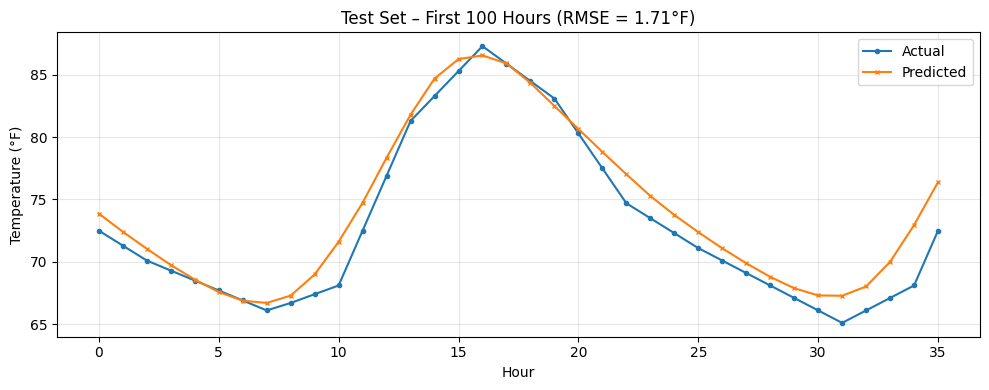

In [16]:

# ---- Plot 1 : Actual vs Predicted (first 100 test points) ----
plt.figure(figsize=(10,4))
plt.plot(y_inv[:100], 'o-', label='Actual', markersize=3)
plt.plot(pred_inv[:100], 'x-', label='Predicted', markersize=3)
plt.title(f"Test Set – First 100 Hours (RMSE = {rmse:.2f}°F)")
plt.xlabel("Hour")
plt.ylabel("Temperature (°F)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
t = 85.0     #in °F
h = 60.0    
w = 12.0    
p = 1005.0   #hPa

print("="*55)
print("   USING FIXED WEATHER VALUES (Hyderabad Sindh)")
print("="*55)
print(f"Temp: {t}°F")
print(f"Humidity: {h}%")
print(f"Wind Speed: {w} km/h")
print(f"Pressure: {p} hPa")


   USING FIXED WEATHER VALUES (Hyderabad Sindh)
Temp: 85.0°F
Humidity: 60.0%
Wind Speed: 12.0 km/h
Pressure: 1005.0 hPa


In [18]:
# Scale input
user_scaled = scaler.transform([[t, h, w, p]])[0]

# sequence
seq = data[-SEQ_LEN:].copy()
seq[-1] = user_scaled

# next 6 hours predictionn
preds = []
for _ in range(6):
    pr = model.predict(seq.reshape(1, SEQ_LEN, 4), verbose=0)[0,0]
    preds.append(pr)

    new = seq[-1].copy()
    new[0] = pr
    seq = np.vstack([seq[1:], new])

# inverse transform for temp
pred_temps = [scaler.inverse_transform([[v,0,0,0]])[0,0] for v in preds]


e:\weather forcasting project\.venv310lstm\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


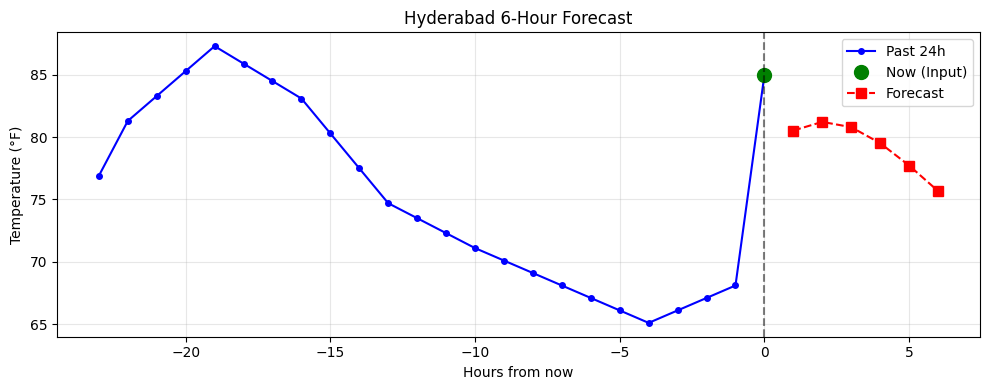

In [19]:
# 6 hours plot
past = scaler.inverse_transform(data[-SEQ_LEN:])[:,0]
past[-1] = t

plt.figure(figsize=(10,4))
plt.plot(range(-SEQ_LEN+1,1), past, 'bo-', label='Past 24h', markersize=4)
plt.plot(0, t, 'go', label='Now (Input)', markersize=10)
plt.plot(range(1,7), pred_temps, 'rs--', label='Forecast', markersize=7)
plt.axvline(0, color='k', linestyle='--', alpha=0.5)
plt.title("Hyderabad 6-Hour Forecast")
plt.xlabel("Hours from now")
plt.ylabel("Temperature (°F)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [20]:

print("\nFORECAST (next 6 hours):")
for i, temp in enumerate(pred_temps, 1):
    print(f"  +{i}h → {temp:.1f}°F")



FORECAST (next 6 hours):
  +1h → 80.5°F
  +2h → 81.2°F
  +3h → 80.8°F
  +4h → 79.5°F
  +5h → 77.7°F
  +6h → 75.7°F
